In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
len(df)

1599

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from random import shuffle

<AxesSubplot:>

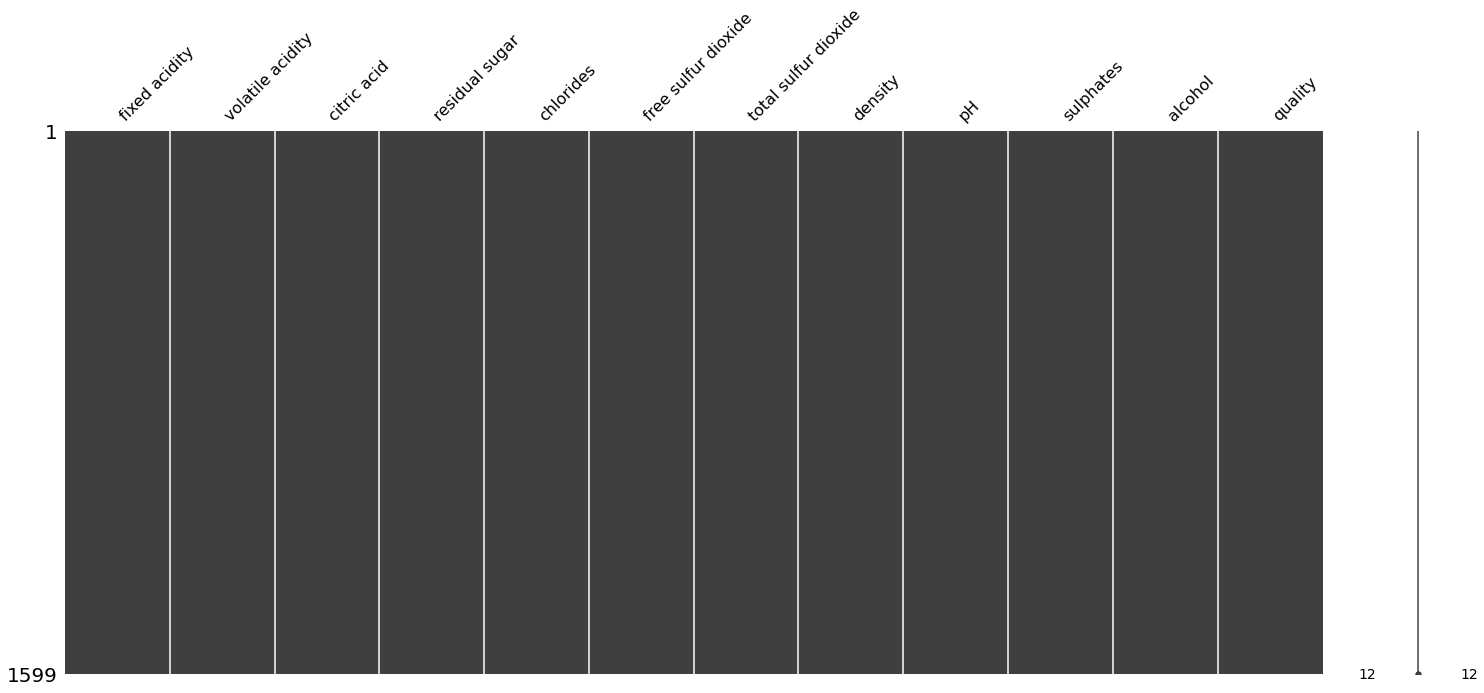

In [8]:
missingno.matrix(df)

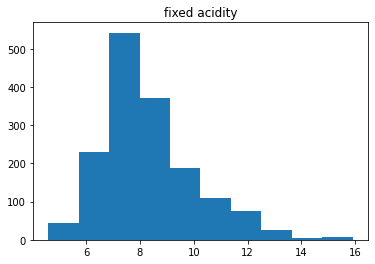

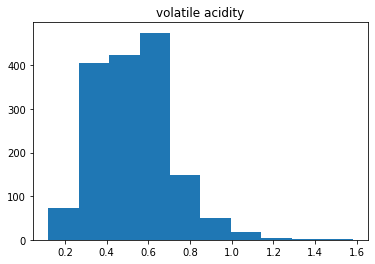

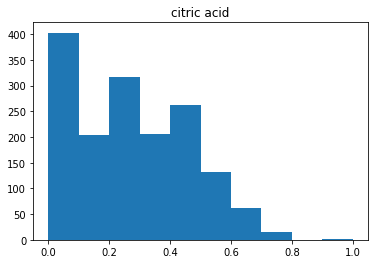

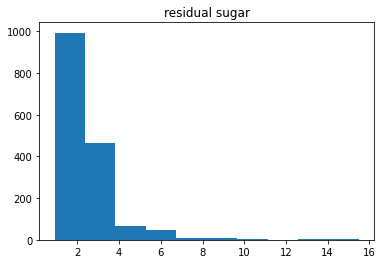

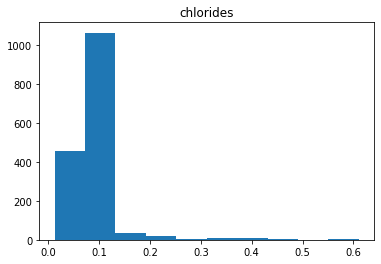

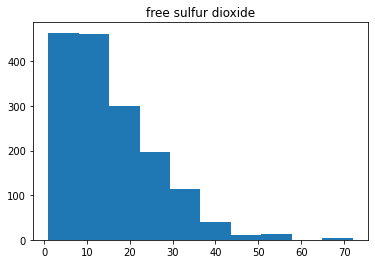

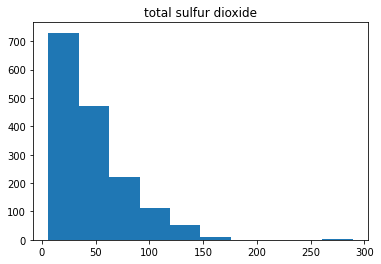

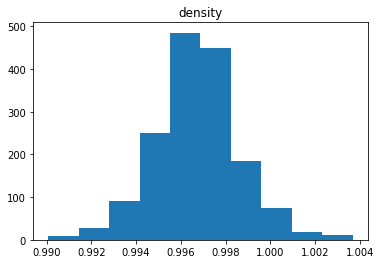

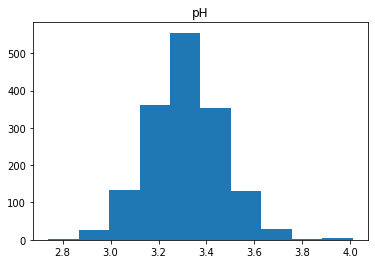

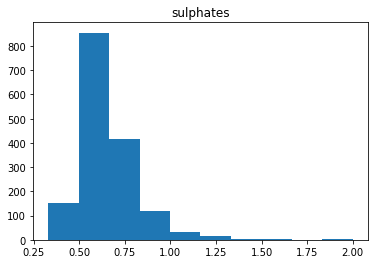

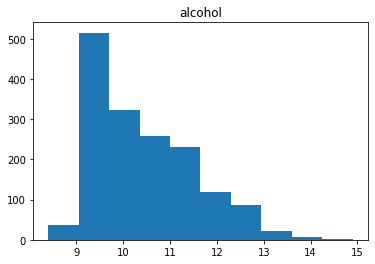

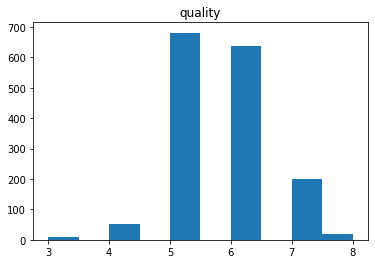

In [9]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

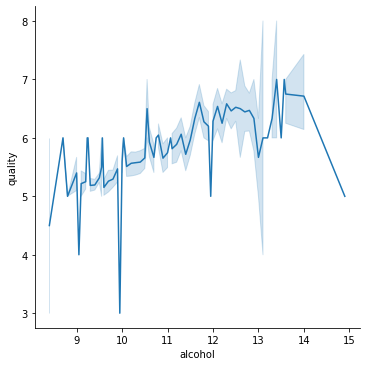

In [10]:
sns.relplot(x='alcohol', y='quality', data=df, kind='line')
plt.show()

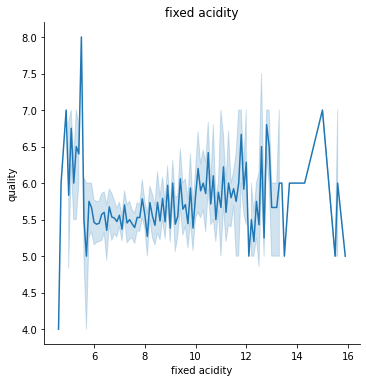

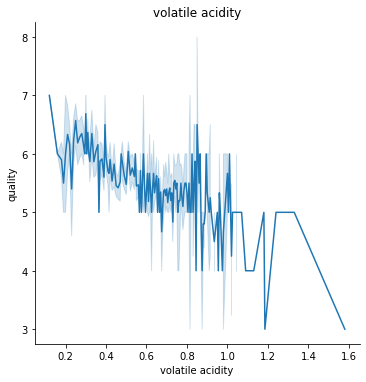

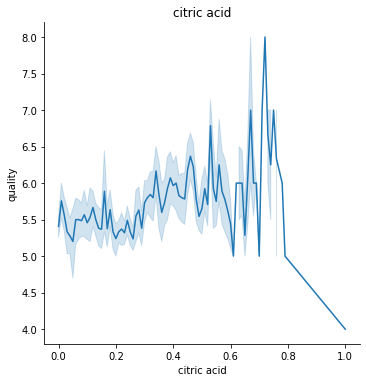

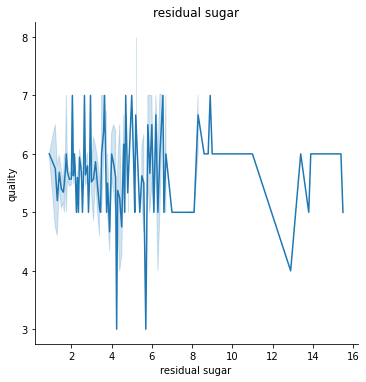

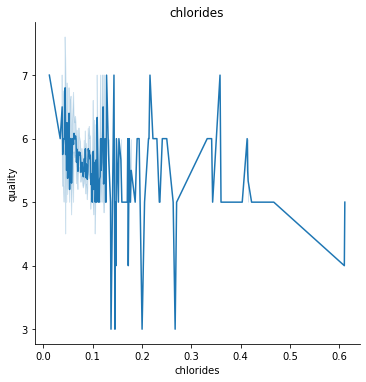

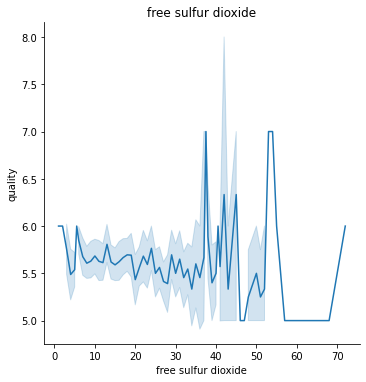

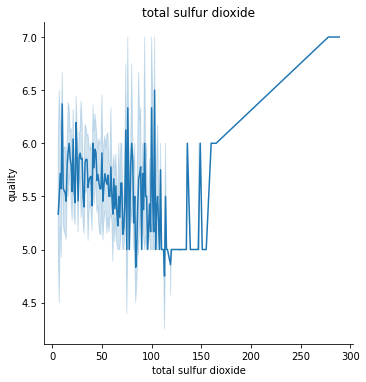

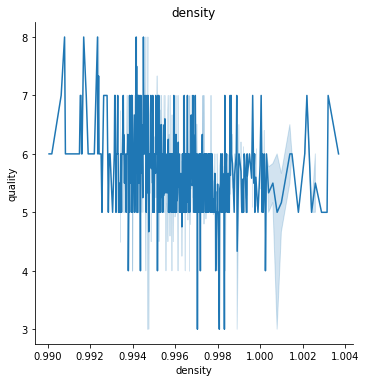

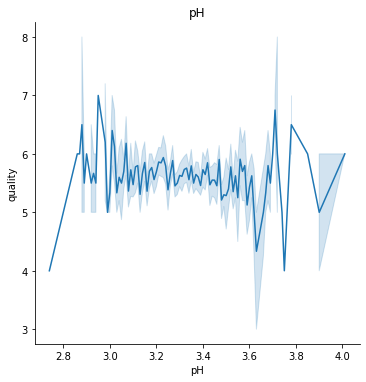

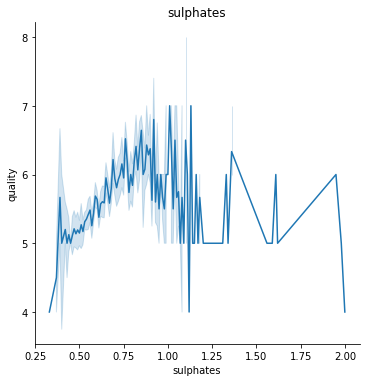

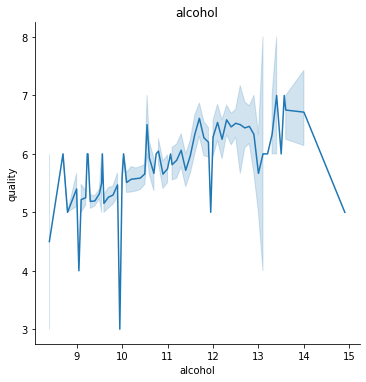

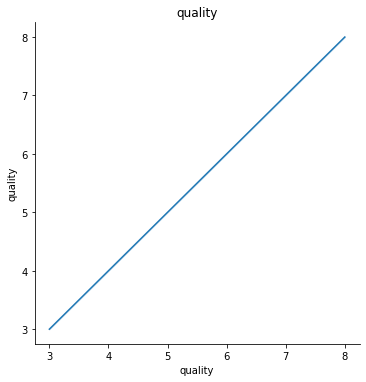

In [11]:
for i in df.columns:
    sns.relplot(x=df[i], y='quality', data=df, kind='line')
    plt.title(i)
    plt.show()

In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

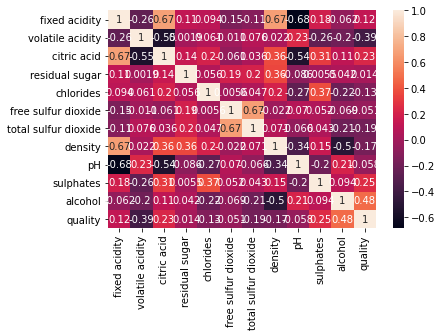

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import  shuffle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
df = shuffle(df)

In [16]:
y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)
X = df.drop('quality', axis=1)

In [17]:
y

1250    0
611     0
1387    0
1588    0
1249    0
       ..
1095    0
863     0
28      0
1065    0
1017    0
Name: quality, Length: 1599, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
len(x_test)

320

In [20]:
len(x_train)

1279

In [21]:
#sc = StandardScaler()
#sc.fit(x_train)
#x_train = sc.transform(x_train)

In [22]:
#x_test = sc.transform(x_test)

In [23]:
model = XGBClassifier(n_estimators=1000, n_jobs=-1, learning_rate=0.1, verbose=False)

In [24]:
model.fit(x_train,y_train, early_stopping_rounds=100,
                   eval_set=[(x_test, y_test)])

[23:45:22] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.62603
[1]	validation_0-logloss:0.57092
[2]	validation_0-logloss:0.52512
[3]	validation_0-logloss:0.48752
[4]	validation_0-logloss:0.45442
[5]	validation_0-logloss:0.42522
[6]	validation_0-logloss:0.40015
[7]	validation_0-logloss:0.37906
[8]	validation_0-logloss:0.36128
[9]	validation_0-logloss:0.34659
[10]	validation_0-logloss:0.33241
[11]	validation_0-logloss:0.32201
[12]	validation_0-log

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.24664
[32]	validation_0-logloss:0.24527
[33]	validation_0-logloss:0.24443
[34]	validation_0-logloss:0.24336
[35]	validation_0-logloss:0.24193
[36]	validation_0-logloss:0.24191
[37]	validation_0-logloss:0.24050
[38]	validation_0-logloss:0.23932
[39]	validation_0-logloss:0.23798
[40]	validation_0-logloss:0.23758
[41]	validation_0-logloss:0.23683
[42]	validation_0-logloss:0.23694
[43]	validation_0-logloss:0.23715
[44]	validation_0-logloss:0.23715
[45]	validation_0-logloss:0.23808
[46]	validation_0-logloss:0.23868
[47]	validation_0-logloss:0.23932
[48]	validation_0-logloss:0.23918
[49]	validation_0-logloss:0.23856
[50]	validation_0-logloss:0.23754
[51]	validation_0-logloss:0.23782
[52]	validation_0-logloss:0.23771
[53]	validation_0-logloss:0.23761
[54]	validation_0-logloss:0.23813
[55]	validation_0-logloss:0.23665
[56]	validation_0-logloss:0.23488
[57]	validation_0-logloss:0.23527
[58]	validation_0-logloss:0.23593
[59]	validation_0-logloss:0.23563
[60]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=False,
              verbosity=None)

In [25]:
preds = model.predict(x_test)

In [26]:
len(y_test)

320

In [27]:
len(preds == y_test)

320

In [28]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       286
           1       0.58      0.76      0.66        34

    accuracy                           0.92       320
   macro avg       0.77      0.85      0.81       320
weighted avg       0.93      0.92      0.92       320



In [29]:
print(accuracy_score(y_test, preds))

0.915625


In [30]:
scores = cross_val_score(model, x_test,y_test, cv=10, verbose=False)
print(np.mean(scores))

[23:45:23] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:45:23] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:24] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:45:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluat

In [31]:
#params = {'n_estimators' : [50, 100, 200,300, 500, 700, 1000],
          #'learning_rate' : [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
          #}
#model_cv = GridSearchCV(model, params, cv=10)
#model_cv#.fit(x_train, y_train)

In [32]:
#print('Best parameters', model_cv.best_params_)